### About the dataset
Housing dataset contains the information of the properties sold in the city of "Nashville" over a sapn of 40 years. It contains all the necessary information like the area of the property, amount it was sold for, number of rooms that the property has etc. Our aim is to find some interesting insights from the data.

### Loading data
1. Import the "housing" data using appropriate functions.


### Cleaning data
1. Replace the missing values with appropriate approximations
2. Rename the columns to better suited names
3. Extract the month and year from the sale date.
4. Extract the pin number from the property address


### EDA
Use appropriate plots and functions to answer the following questions.

1. How has the price of properties changed over the years
2. Does a specific month or span of months have the highest property prices?
3. For what purpose were the properties generally purchased?
4. What is the average age of the properties?
5. Have the age of houses affected the price?
6. Have the number of rooms in the house affected the price?
7. Does the size of the property (no. of acres) have any influence in its price?
8. Are houses located in specific pin numbers expensive over the others?
9. How have house prices changed in the 21st centuary as supposed to 20th centuary. 

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(color_codes=True)

**LOADING DATA**

In order to load the data, we will use the pandas library and particularly the 'read_excel' method.

In [ ]:
path='/content/Housing.csv'

In [ ]:
data=pd.read_csv(path,index_col=0)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**CLEANING DATA**

The major goal of cleaning data is to ensure that all the null values are either eliminated or replaced so as to ensure that the data is fit for analysis.

In [ ]:
data.isnull().sum()

LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
Acre               30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

1. Replace the missing values with appropriate approximations

In [ ]:
data['PropertyAddress']=data['PropertyAddress'].interpolate(method='linear')
data['Acre']=data['Acre'].interpolate(method='linear')
data['LandValue']=data['LandValue'].interpolate(method='linear')
data['BuildingValue']=data['BuildingValue'].interpolate(method='linear')
data['TotalValue']=data['TotalValue'].interpolate(method='linear')
data['YearBuilt']=data['YearBuilt'].interpolate(method='linear')
data['Bedrooms']=data['Bedrooms'].interpolate(method='linear')
data['FullBath']=data['FullBath'].interpolate(method='linear')
data['HalfBath']=data['HalfBath'].interpolate(method='linear')
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0


**2. Rename the columns to better suited names**

In [ ]:
data.rename(columns={"FullBath":"FullBathroom"},inplace=True)
data.rename(columns={"HalfBath":"HalfBathroom"},inplace=True)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom
UniqueID,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0


**3. Extract the month and year from the sale date.**

In [ ]:
data['year']=pd.DatetimeIndex(data.SaleDate).year
data['month']=pd.DatetimeIndex(data.SaleDate).month
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,year,month
UniqueID,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,2013,4
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,2014,6
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,2016,9
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,2016,1
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2015,5
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2015,3
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2016,8


**4. Extract the pin number from the property address**

In [ ]:
data['Pin number']=data['PropertyAddress'].str.extract('([0-9]+)')
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,year,month,Pin number
UniqueID,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,2013,4,1808
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,2014,6,1832
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,2016,9,1864
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,2016,1,1853
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,2014,10,1829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2015,5,1435
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2015,3,1423
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2016,8,1804


**EXPLORATORY DATA ANALYSIS**

1. How has the price of properties changed over the years

In [ ]:
d=data.groupby('year')['SalePrice'].count()
d

year
2013    11292
2014    14283
2015    16829
2016    14071
2019        2
Name: SalePrice, dtype: int64

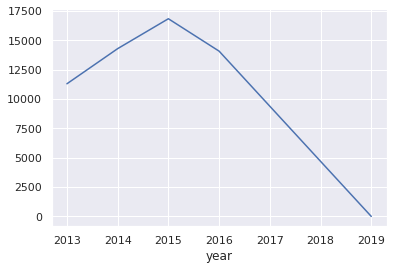

In [ ]:
sns.lineplot(x=d.index, y =d.values)

The above line plot clearly says that, the sale prices of houses peaked around the year 2015, and there after it gradually got decreased 

2. Does a specific month or span of months have the highest property prices?

In [ ]:
m=data.groupby('month')['SalePrice'].count()
m

month
1     3227
2     2778
3     4474
4     5223
5     5932
6     6593
7     5471
8     5620
9     5451
10    4822
11    3114
12    3772
Name: SalePrice, dtype: int64

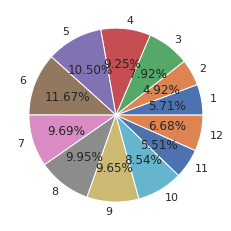

In [ ]:
plt.pie(m,labels=m.index,autopct='%.2f%%')
plt.show()

The above piechart shows that the sales are high in the month of june

3. For what purpose were the properties generally purchased?

In [ ]:
p=data.groupby('LandUse')['LandUse'].count()
p.sort_values(ascending = False)

LandUse
SINGLE FAMILY                                 34197
RESIDENTIAL CONDO                             14080
VACANT RESIDENTIAL LAND                        3547
VACANT RES LAND                                1549
DUPLEX                                         1373
ZERO LOT LINE                                  1048
CONDO                                           247
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
VACANT COMMERCIAL LAND                           17
SPLIT CLASS                                      17
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
PARS

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


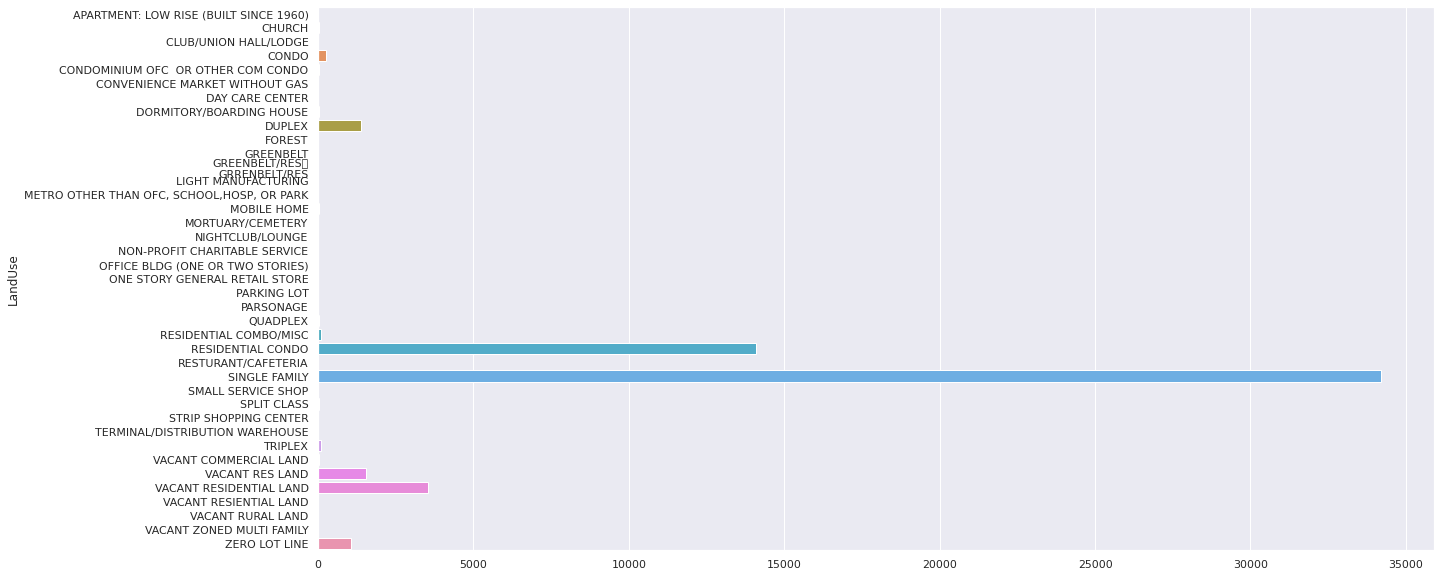

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=p.values,y=p.index)

The above barchart shows that the RESIDENTIAL COMBO and SINGLE FAMILY are the major purpose to purchase the property

4. What is the average age of the properties?

In [ ]:
math.trunc(data['year'].mean())

2014

5. Have the age of houses affected the price?

In [ ]:
a=data.groupby('YearBuilt')['SalePrice'].count()
a

YearBuilt
1799.000000      1
1832.000000      1
1840.187500      1
1848.375000      1
1856.562500      1
              ... 
2015.968487      1
2015.977011      1
2015.988506      1
2016.000000    612
2017.000000     13
Name: SalePrice, Length: 23196, dtype: int64

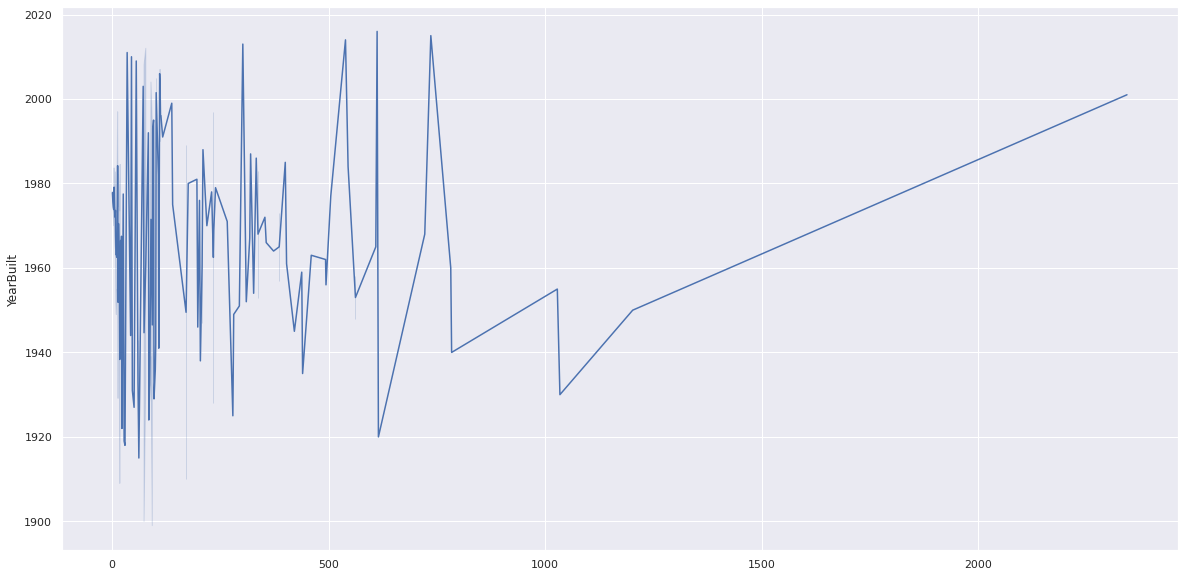

In [ ]:
sns.lineplot(x=a.values, y=a.index)

From the above line plot we can say that the ages of house has affected the price 

6. Have the number of rooms in the house affected the price?

In [ ]:
data["TotalRooms"]=data['Bedrooms']+data['FullBathroom']+data['HalfBathroom']
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,year,month,Pin number,TotalRooms
UniqueID,,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,2013,4,1808,6.0
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,2014,6,1832,8.0
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,2016,9,1864,7.0
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,2016,1,1853,6.0
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,2014,10,1829,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2015,5,1435,3.0
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2015,3,1423,3.0
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,160.06,1921700.0,0.0,1921700.0,2001.0,3.0,0.0,0.0,2016,8,1804,3.0


In [ ]:
r=data.groupby('TotalRooms')['SalePrice'].count()
r

TotalRooms
0.000000     40
0.500000      1
0.600000      1
0.909091      1
1.000000      1
             ..
16.000000     2
17.000000     2
18.000000     1
20.000000     2
22.000000     1
Name: SalePrice, Length: 15713, dtype: int64

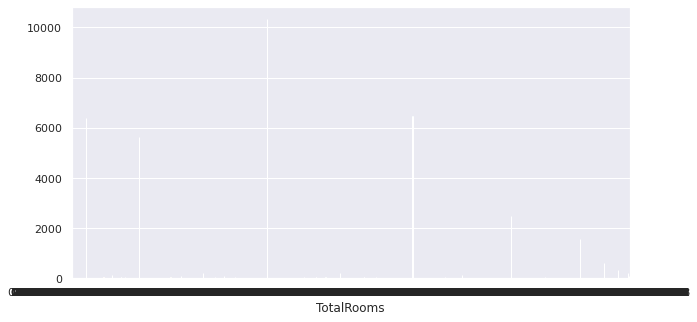

In [81]:
sns.barplot(x=r.index,y=r.values,color=None)

**7. Does the size of the property (no. of acres) have any influence in its price?**

In [ ]:
s=data.groupby('Acre')['SalePrice'].count()
s

Acre
0.010000       4
0.011223       1
0.012447       1
0.013670       1
0.014894       1
              ..
159.749130     1
159.826848     1
159.904565     1
159.982283     1
160.060000    36
Name: SalePrice, Length: 27494, dtype: int64

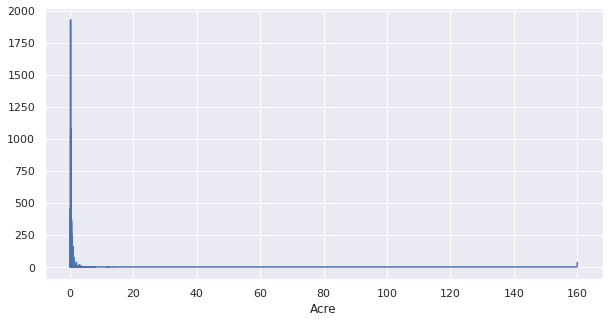

In [82]:
sns.lineplot(x=s.index, y=s.values)

8. Are houses located in specific pin numbers expensive over the others?

In [ ]:
n=data.groupby('SalePrice')['Pin number'].count()
n

SalePrice
$1,20,000      2
$1,78,500      1
$1,95,000      2
$11,24,900     1
$3,62,500      1
              ..
999000         8
999900         4
99999          2
999995         1
999999         1
Name: Pin number, Length: 8089, dtype: int64

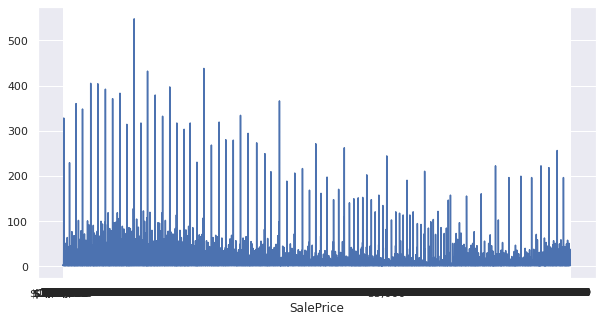

In [78]:
sns.lineplot(x=n.index,y=n.values)

9. How have house prices changed in the 21st centuary as supposed to 20th centuary.

In [79]:
c=data.groupby('SalePrice')['TotalValue'].count()
c

SalePrice
$1,20,000      2
$1,78,500      1
$1,95,000      2
$11,24,900     1
$3,62,500      1
              ..
999000         8
999900         4
99999          2
999995         1
999999         1
Name: TotalValue, Length: 8089, dtype: int64

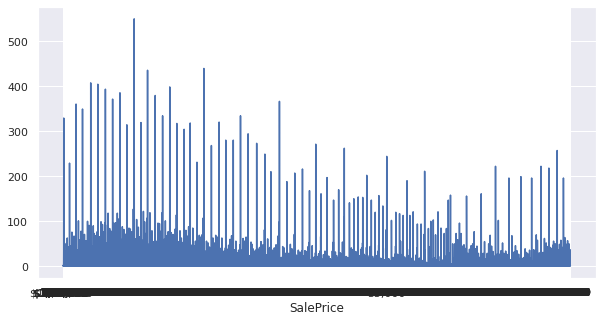

In [80]:
sns.lineplot(x=c.index,y=c.values)